In [42]:
import numpy as np
import pandas as pd


# for operation 2
df2 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])

# Handling Missing Values

## Delete Row

In [43]:
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
df1.isnull().sum().sort_values(ascending=False)
df_no_missing = df1.dropna(axis=0)
print(df_no_missing.head(5))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0            4.0           35.0    168.0  43.1   
6             3     78.0            5.0           32.0     88.0  31.0   
8             2    197.0            7.0           45.0    543.0   3.5   
13            1    189.0            6.0           23.0    846.0   3.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  


## Fill with mean

In [44]:
from sklearn.preprocessing import Imputer

# Data from excel
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])

#Imputer to replace Null with mean
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)


imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)

#print
print(df1.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  105.659898  33.6   
1          1.0     85.0           66.0      29.000000  105.659898  26.6   
2          8.0    183.0           64.0      25.876155  105.659898  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0            4.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


## Fill with median

In [45]:
from sklearn.preprocessing import Imputer

# Data from excel
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])

#Imputer to replace Null with mean
imp = Imputer(missing_values = 'NaN', strategy='median', axis=0)


imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)

#print
print(df1.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


# Handling Noicy Data

## Function to find outliers

In [46]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values


## Outliers Found in each column

In [47]:
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))

print("Outliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))

print("Outliers for BloodPressure")
bp_indices, bp_values = find_outliers_tukey(df1['BloodPressure'])
print(np.sort(bp_values))


print("Outliers for SkinThickness")
st_indices, st_values = find_outliers_tukey(df1['SkinThickness'])
print(np.sort(st_values))

print("Outliers for Insulin")
in_indices, in_values = find_outliers_tukey(df1['Insulin'])
print(np.sort(in_values))

print("Outliers for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df1['BMI'])
print(np.sort(bmi_values))

print("Outliers for DiabetesPedigreeFunction")
dpf_indices, dpf_values = find_outliers_tukey(df1['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

print("Outliers for Age")
age_indices, age_values = find_outliers_tukey(df1['Age'])
print(np.sort(age_values))


Outliers for Glucose
[]
Outliers for Pregnancies
[ 14.  14.  15.  17.]
Outliers for BloodPressure
[ 122.]
Outliers for SkinThickness
[  1.   1.   1.   1.   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.
   4.   5.   5.   5.   6.  48.  48.  48.  48.  49.  49.  49.  51.  52.  52.
  54.  54.  56.  63.  99.]
Outliers for Insulin
[   1.    1.    1.    1.    1.    1.    1.    2.    2.    2.    2.    3.
    4.    4.    5.    5.    5.    6.    6.    6.    7.    7.    7.    9.
    9.    9.    9.   11.   11.   11.   11.   11.   11.   12.   12.   12.
   12.   12.   12.   12.   12.   13.   13.   13.   13.   13.   13.   13.
   13.   13.   14.   14.   14.   14.   14.   14.   14.   14.   14.   14.
   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.
 

## Deleting Row

In [48]:
df_del = df1.drop(bp_indices)
print(df_del.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


## Replace with min

In [49]:
min_in = np.min(df_del['Insulin'])
df_del['Insulin'] = np.where(df_del['Insulin'] > 321, min_in, df_del['Insulin'])
print(df_del.head(5))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


## Normalization and Reduction

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_del)

PCA(copy=True, n_components=2, whiten=False)

df = pca.transform(df_del)

df_2d = pd.DataFrame(df)

df_2d.index = df_del.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head(5)



,PC1,PC2
0,33.055249,-35.671449
1,-13.762445,6.138142
2,58.976048,-59.330959
3,4.351620,20.820122
4,89.453205,42.851607


# Visualization

## Histogram

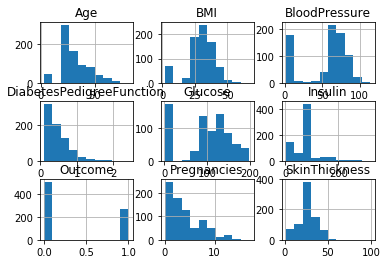

In [51]:
import matplotlib.pyplot as plt
df_del.hist()
plt.show()

## Density Plot

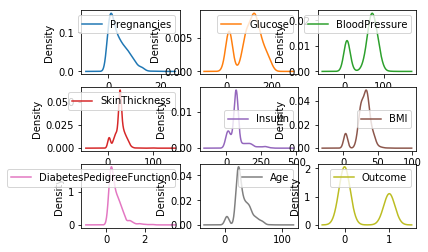

In [52]:
df_del.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

## Box Plot

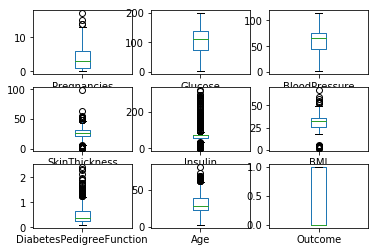

In [53]:
df_del.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()


## Correlation Matrix

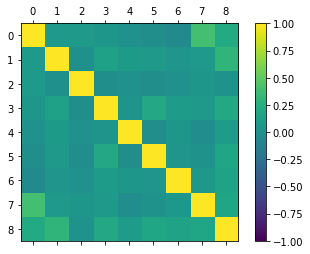

In [54]:
cor = df_del.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

## Scatter Plot

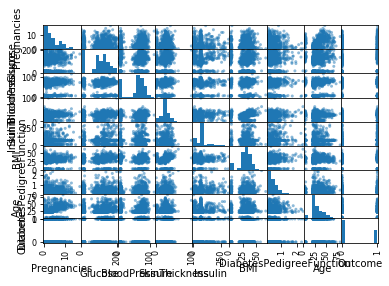

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del)
plt.show()